In [1]:
import pandas as pd

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Carga de datos
df = pd.read_csv("processed_data_ultimate.csv")

# 2. Definir X (features) e y (target)
#    - Eliminamos las columnas 'Hz', 'medida', y 'Tipo' de X
#    - 'Tipo' será nuestro objetivo (y)
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# 3. División en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,      # 20% para test
    random_state=42,    # Semilla para reproducibilidad
    shuffle=True
)

# 4. Creación y entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predicción en el conjunto de test
y_pred = model.predict(X_test)

# 6. Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)



Accuracy: 0.99
Matriz de Confusión:
[[1514    3    9    0    3    0    0    2    1   45]
 [   4 2755    0    0    1    0    0    0    0    5]
 [   3    0  381    0    1    0    0    0    0    0]
 [   0    0    0 1587    0    0    0    0    0    0]
 [   2    2    0    0 1650    2    0    1    0    0]
 [   1    0    0    0    3 1581    0    3    0    2]
 [   0    0    0    0    0    0 1622    0    0    0]
 [  12    1    0    0    0    2    0 1579    0    3]
 [   0    0    0    0    0    0    0    0 1611    0]
 [   7    4    2    0    0    0    0    9    0 2387]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.96      0.97      1577
              imbalance       1.00      1.00      1.00      2765
                 normal       0.97      0.99      0.98       385
    overhang_ball_fault       1.00      1.00      1.00      1587
    overhang_cage_fault       1.00      1.00      1.00      1657
    overhang_out

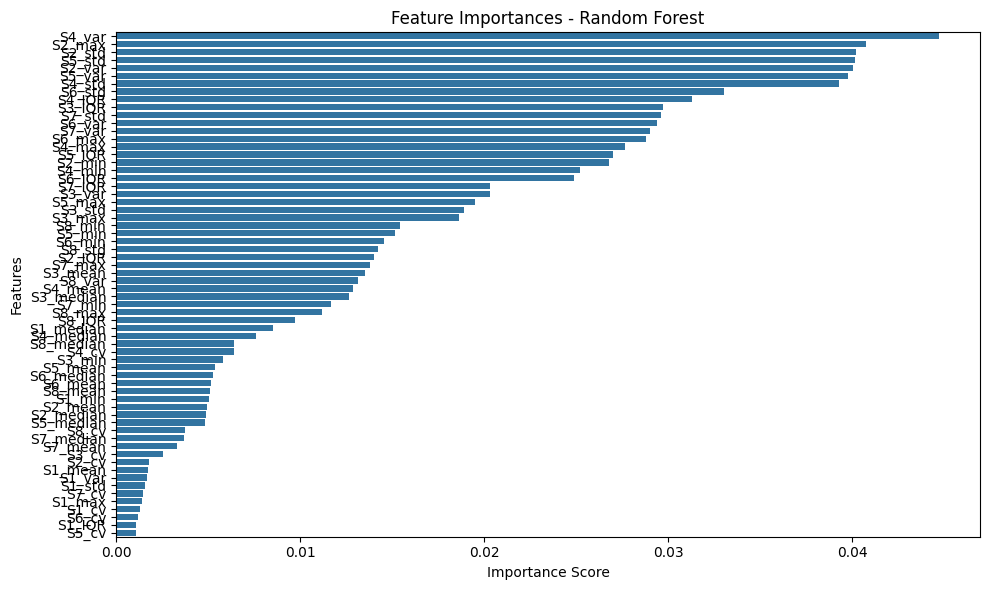

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Asumiendo que ya entrenaste tu modelo y tienes:
# model = RandomForestClassifier(...)
# model.fit(X_train, y_train)

# 1. Extraer importancias de las características
importances = model.feature_importances_

# 2. Crear un Series de pandas que asocie cada importancia con el nombre de la columna
feature_importance_series = pd.Series(importances, index=X_train.columns)

# 3. Ordenar de mayor a menor
feature_importance_series = feature_importance_series.sort_values(ascending=False)

# 4. Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
